In [1]:
import requests 
import time
import datetime as dt
from splinter import Browser
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import datetime as dt
from Craigslist_Scrapper import page_scrapper, page_cleaner

In [2]:
links_df = pd.read_csv(r'C:\Users\beauw\Documents\Coding\Finance\real_estate\data\CL_City_Links.csv')
where = 'orange county'
specific_city_df = links_df.loc[links_df['City'] == where]
specific_city_df = specific_city_df.reset_index()
craigslist_base_url = specific_city_df['Link'][0] + 'search/apa?min_price=5&availabilityMode=0&sale_date=all+dates'


In [3]:
all_results_list = []
range_count = 0
final_count = 2
counter = 0
# range_count != final_count
while range_count != final_count:
    craigslist_base_url = specific_city_df['Link'][0] + f'search/apa?s={range_count}&availabilityMode=0&min_price=5'
    resp = requests.get(craigslist_base_url)
    soup = BeautifulSoup(resp.text, 'lxml')
    time.sleep(.01)
    results_list = page_scrapper(soup)
    results_list = page_cleaner(results_list)
    all_results_list.append(results_list)
    final_count = int(soup.find('span', class_ = 'totalcount').text)
    range_count = int(soup.find('span', class_ = 'rangeTo').text)
    print(craigslist_base_url, range_count, final_count)
    counter += 1

https://orangecounty.craigslist.org/search/apa?s=0&availabilityMode=0&min_price=5 120 3000
https://orangecounty.craigslist.org/search/apa?s=120&availabilityMode=0&min_price=5 240 3000
https://orangecounty.craigslist.org/search/apa?s=240&availabilityMode=0&min_price=5 360 3000
https://orangecounty.craigslist.org/search/apa?s=360&availabilityMode=0&min_price=5 480 3000
https://orangecounty.craigslist.org/search/apa?s=480&availabilityMode=0&min_price=5 600 3000
https://orangecounty.craigslist.org/search/apa?s=600&availabilityMode=0&min_price=5 720 3000
https://orangecounty.craigslist.org/search/apa?s=720&availabilityMode=0&min_price=5 840 3000
https://orangecounty.craigslist.org/search/apa?s=840&availabilityMode=0&min_price=5 960 3000
https://orangecounty.craigslist.org/search/apa?s=960&availabilityMode=0&min_price=5 1080 3000
https://orangecounty.craigslist.org/search/apa?s=1080&availabilityMode=0&min_price=5 1200 3000
https://orangecounty.craigslist.org/search/apa?s=1200&availabilityMod

In [4]:
results_list = []
for records in all_results_list:
    for record in records:
        results_list.append(record)

len(results_list)

2901

In [25]:
results_df = pd.DataFrame(results_list)
results_df = results_df.drop_duplicates()
results_df = results_df.sort_values(by=['PricePerRoom'])
# results_df = results_df.loc[results_df['Location'] == 'irvine']
# results_df = results_df.loc[results_df['Bedrooms'] > 2]
results_df.head(n=50)

,Bedrooms,Date,Info,Link,Location,Price,PricePerRoom,PricePerSqFt,SquareFootage,Title
1146,2.0,2019-10-21,2br-,https://orangecounty.craigslist.org/apa/d/newp...,36thst,175,87.500000,NaN,NaN,"fantastic newport beach-- daily, weekly or mon..."
1149,2.0,2019-10-21,2br-,https://orangecounty.craigslist.org/apa/d/newp...,36thst,175,87.500000,NaN,NaN,"fantastic newport beach-- daily, weekly or mon..."
2017,5.0,2019-10-20,5br-2290ft2-,https://orangecounty.craigslist.org/apa/d/tust...,orange,574,114.800000,0.250655,2290.0,"5 bed_3.5 baths with ample closet, dual pane w..."
488,3.0,2019-10-21,3br-1912ft2-,https://orangecounty.craigslist.org/apa/d/newp...,fullertonormissionviejo,925,308.333333,0.483787,1912.0,4 bedroom 2 baths clean area
1570,3.0,2019-10-21,3br-,https://orangecounty.craigslist.org/apa/d/irvi...,irvine,1020,340.000000,NaN,NaN,$1020 roomate needed immediately! private bath...
489,3.0,2019-10-21,3br-1259ft2-,https://orangecounty.craigslist.org/apa/d/waln...,villaparkfountainvalley,1160,386.666667,0.921366,1259.0,3 bedroom 1.5 bath newly renovated .
1630,4.0,2019-10-21,4br-,https://orangecounty.craigslist.org/apa/d/full...,"fullerton,ca",1800,450.000000,NaN,NaN,this beautiful home is located in the highly d...
1725,4.0,2019-10-21,4br-1781ft2-,https://orangecounty.craigslist.org/apa/d/oran...,,1815,453.750000,1.019090,1781.0,~~~+welc0me t0 this beautifully rem0del bedr00...
1748,4.0,2019-10-21,4br-1781ft2-,https://orangecounty.craigslist.org/apa/d/oran...,,1815,453.750000,1.019090,1781.0,~~~+welc0me t0 this beautifully rem0del bedr00...
74,2.0,2019-10-21,2br-1150ft2-,https://orangecounty.craigslist.org/apa/d/gard...,gardengrove,950,475.000000,0.826087,1150.0,roommate for 2 bed 2 bath


In [27]:
results_df['Link'][2402]

'https://orangecounty.craigslist.org/apa/d/gorgeous-4-bedroom-single-family-house/7003514055.html'

In [7]:
results_df['PricePerRoom'].mean()

1477.2291850220263

In [8]:
results_df['PricePerRoom'].std()

546.6830332239657

In [9]:
results_df['PricePerRoom'].skew()

1.9156874359100435

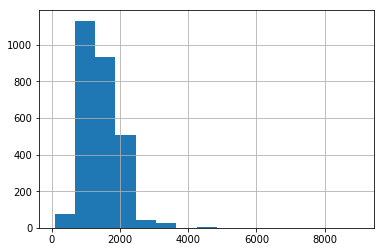

In [11]:
results_df['PricePerRoom'].hist(bins = 15)